In [58]:
import numpy as np
import pandas as pd
import pickle as pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [59]:
import sys
sys.path.append('/home/jfear/devel/GalaxyTools')
from runOrderRegression import *

In [3]:
trans = pickle.load(open('/home/jfear/tmp/trans.pkl', 'rb'))

In [60]:
clean = col.dropna().reset_index().convert_objects(convert_numeric=True)
clean.columns = ['run', 'val']

In [62]:
model = smf.ols(formula='val ~ run', data=clean)
results = model.fit()

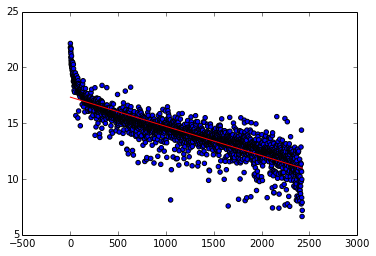

In [29]:
plt.scatter(x, y)
plt.plot(x, res.fittedvalues, 'r-')

In [65]:
res = trans.apply(runOrder)

In [91]:
row = res[0]

In [92]:
name, x, y, res = row
fitted = res.fittedvalues

# Get 95% CI
prstd, lower, upper = wls_prediction_std(res)

In [100]:
slope = res.params['run']
pval = res.pvalues['run']

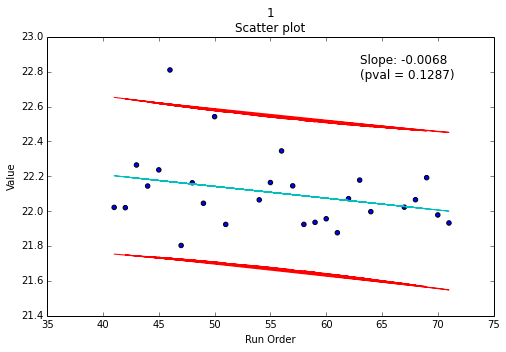

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(x, y)
ax.plot(x, lower, 'r-')
ax.plot(x, fitted, 'c-')
ax.plot(x, upper, 'r-')
ax.set_xlabel('Run Order')
ax.set_ylabel('Value')
ax.set_title(u'{}\nScatter plot'.format(name))
ax.text(.7, .85, u'Slope: {0:.4f}\n(pval = {1:.4f})'.format(slope, pval, '%.4f'), transform=ax.transAxes, fontsize=12)